In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import os
import numpy as np
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


path = "./data/"
save_path = "./data/"
filename_read = os.path.join(path,"CrabAgePrediction.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# def missing_median(df, name):
#     med = df[name].median()
#     df[name] = df[name].fillna(med)

# nu am avut nevoie de missing median deoarece nu lipsesc valori


crab = df['Sex']
df.drop('Sex',1,inplace=True)
#missing_median(df, 'Weight')

dataset=df.values
x=dataset[:,0:6]         #8 pentru ca din cele 9 coloane am eliminat coloana Sex
y=dataset[:,7]            #stabilim ca variabila scop Age

model = Sequential()
model.add(Dense(35, input_dim=x.shape[1], activation='relu'))        # Stratul ascuns 1
model.add(Dense(20))                              # Stratul ascuns 2
model.add(Dense(15))                             # Stratul ascuns 3
model.add(Dense(5))                              # Stratul ascuns 4      
model.add(Dense(1))                                                   # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=1000)


pred = model.predict(x)
print("Shape: {}".format(pred.shape))


# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Final score (RMSE):{}".format(score))


for i in range(30):
    print("{}. Sex: {}, Age: {}, predicted Age: {}".format(i+1,crab[i],y[i],pred[i]))


# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


# Plot the chart
chart_regression(pred.flatten(),y)



# save entire network to HDF5 (save everything, suggested)
model.save(os.path.join(save_path,"network.h5"))


C:\Users\ion_i\AppData\Local\Temp\ipykernel_4276\1949906963.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Sex',1,inplace=True) # dam drop la coloana neinteresata


Epoch 1/800
92/92 - 1s - loss: 19.0435 - val_loss: 11.5127
Epoch 2/800
92/92 - 0s - loss: 7.9080 - val_loss: 5.0650
Epoch 3/800
92/92 - 0s - loss: 5.3659 - val_loss: 4.7922
Epoch 4/800
92/92 - 0s - loss: 5.5512 - val_loss: 5.3670
Epoch 5/800
92/92 - 0s - loss: 5.3262 - val_loss: 4.5376
Epoch 6/800
92/92 - 0s - loss: 5.1036 - val_loss: 4.4408
Epoch 7/800
92/92 - 0s - loss: 5.0484 - val_loss: 4.5766
Epoch 8/800
92/92 - 0s - loss: 5.0805 - val_loss: 5.7328
Epoch 9/800
92/92 - 0s - loss: 5.1372 - val_loss: 6.1357
Epoch 10/800
92/92 - 0s - loss: 5.2065 - val_loss: 4.4142
Epoch 11/800
92/92 - 0s - loss: 4.9756 - val_loss: 4.3864
Epoch 12/800
92/92 - 0s - loss: 5.2588 - val_loss: 4.6492
Epoch 13/800
92/92 - 0s - loss: 4.9195 - val_loss: 4.3419
Epoch 14/800
92/92 - 0s - loss: 4.8532 - val_loss: 4.6286
Epoch 15/800
92/92 - 0s - loss: 4.8207 - val_loss: 4.3411
Epoch 16/800
92/92 - 0s - loss: 4.8778 - val_loss: 4.4142
Epoch 17/800
92/92 - 0s - loss: 4.7552 - val_loss: 5.0417
Epoch 18/800
92/92 - 

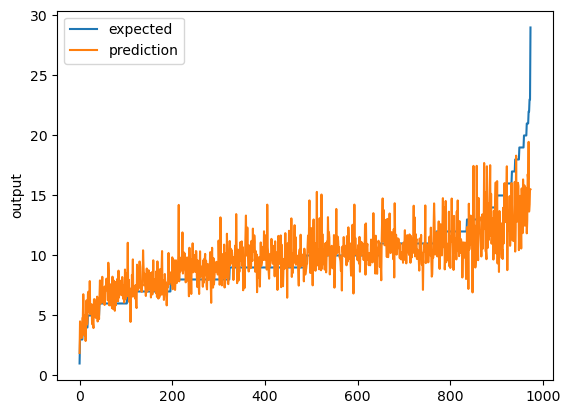

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import os
import numpy as np
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

path = "./data/"
save_path = "./data/"
filename_read = os.path.join(path,"CrabAgePrediction.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])  # se pune automat "?" in spatii libere

crab = df['Sex']
df.drop('Sex',1,inplace=True) # dam drop la coloana neinteresata

dataset=df.values
x=dataset[:,0:6]    # au ramas 8 coloane deoarece am dat drop la coloana Sex 
y=dataset[:,7]      # coloana 8 este Age

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(40, input_dim=x.shape[1], activation='relu')) # Stratul ascuns 1
model.add(Dense(50)) # Stratul ascuns 2
model.add(Dense(35)) # Stratul ascuns 3
model.add(Dense(1)) # output

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=800)

# Predict
pred = model.predict(x_test)

# Measure MSE error
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

#--------------------------------------------------------------------------
# Grafic de regresie
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Trasează graficul
chart_regression(pred.flatten(),y_test)

# Salveaza toata reteaua in HDF5
model.save(os.path.join(save_path,"network_fine.h5"))